In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
plt.rc('font', family = 'serif', size = 13, weight = "bold")
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('axes', linewidth = 2)
plt.rc('lines', linewidth = 3)
plt.rc('figure', figsize = (6, 6))
plt.rc('legend', fontsize = 13)

cm = plt.cm.get_cmap('tab20')

### Linear Regression

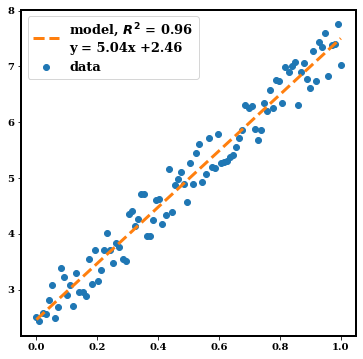

In [71]:
from sklearn.linear_model import LinearRegression

# perp toy data
x = np.linspace(0, 1, 100)
a, b = 5, 2
y = x * a + b + np.random.rand(100)

# train model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

a_, b_ = model.coef_[0], model.intercept_
r_sqaured = model.score(x.reshape(-1, 1), y)

plt.scatter(x, y, label = "data")
plt.plot(x, a_ * x + b_, label = "model, $R^2$ = {:.2f}\ny = {:.2f}x +{:.2f}".format(r_sqaured,a_,b_), color = cm.colors[2], ls = "--")
plt.legend() 
plt.show()

### Polynomial Regression 

#### Ridge Regression - l2 normalization
- **cost fucntion:** $J(w) = MSE(w) + \alpha \frac{1}{2} \sum_{i=1}^{n}w_{i}^{2}$

#### Lasso Regression - l1 normalization
- **cost fucntion:** $J(w) = MSE(w) + \alpha \sum_{i=1}^{n}|w_{i}|$

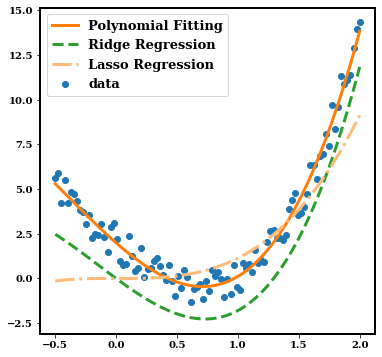

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

# perp toy data
x = np.linspace(-.5, 2, 100)
a, b, c, d = 1, -6, 2, 2
y = a + b * x + c * x ** 2 + d * x ** 3 + np.random.rand(100) * 2
plt.scatter(x, y, label = "data")

# Polynomial Fitting
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),\
                  ('linear', LinearRegression(fit_intercept = False))])

model.fit(x.reshape(-1, 1), y)

a_, b_, c_, d_ = model.named_steps['linear'].coef_
y_pred = (lambda x: a_ + b_* x + c_ * x ** 2 + d_ * x ** 3)(x)
plt.plot(x, y_pred, label = "Polynomial Fitting", color = cm.colors[2], ls = "-")

# Ridge Regression 
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),\
                  ('linear', Ridge(alpha = 1))])

model.fit(x.reshape(-1, 1), y)

a_, b_, c_, d_ = model.named_steps['linear'].coef_
y_pred = (lambda x: a_ + b_* x + c_ * x ** 2 + d_ * x ** 3)(x)
plt.plot(x, y_pred, label = "Ridge Regression", color = cm.colors[4], ls = "--")

# Lasso Regression 
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),\
                  ('linear', Lasso(alpha = 1))])

model.fit(x.reshape(-1, 1), y)

a_, b_, c_, d_ = model.named_steps['linear'].coef_
y_pred = (lambda x: a_ + b_* x + c_ * x ** 2 + d_ * x ** 3)(x)
plt.plot(x, y_pred, label = "Lasso Regression", color = cm.colors[3], ls = "-.")



plt.legend() 
plt.show()

### Classification,  Model Selection - AUC/ROC

In [91]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

ds = load_breast_cancer()
X, y = ds["data"], ds["target"]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### LogisticRegression

In [93]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1e5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

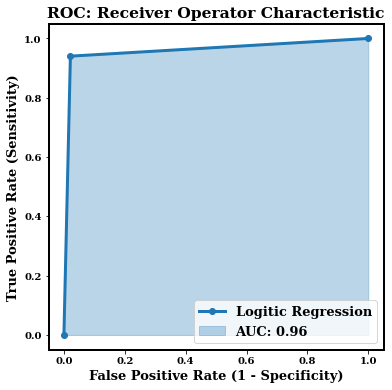

In [118]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# help(roc_curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, "-o", label = "Logitic Regression", color = cm.colors[0])
plt.fill_between(fpr, len(tpr) * [0], tpr, color = cm.colors[0], alpha = .3, label = "AUC: {:.2f}".format(auc_score))
plt.title("ROC: Receiver Operator Characteristic", weight = "bold")
plt.xlabel("False Positive Rate (1 - Specificity)", weight = "bold")
plt.ylabel("True Positive Rate (Sensitivity)", weight = "bold")
plt.legend();plt.show()

### Decision Tree

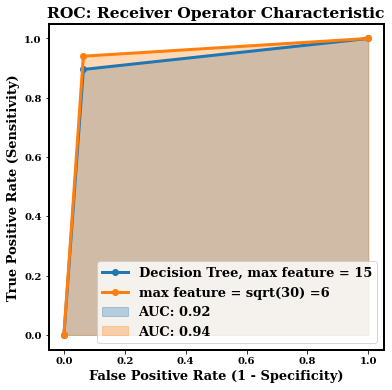

In [144]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import roc_curve, auc, roc_auc_score

model = DecisionTreeClassifier(max_features = 15)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# help(roc_curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, "-o", label = "Decision Tree, max feature = 15", color = cm.colors[0])
plt.fill_between(fpr, len(tpr) * [0], tpr, color = cm.colors[0], alpha = .3, label = "AUC: {:.2f}".format(auc_score))

model = DecisionTreeClassifier(max_features = "sqrt")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# help(roc_curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, "-o", label = "max feature = sqrt(30) =6", color = cm.colors[2])
plt.fill_between(fpr, len(tpr) * [0], tpr, color = cm.colors[2], alpha = .3, label = "AUC: {:.2f}".format(auc_score))

plt.title("ROC: Receiver Operator Characteristic", weight = "bold")
plt.xlabel("False Positive Rate (1 - Specificity)", weight = "bold")
plt.ylabel("True Positive Rate (Sensitivity)", weight = "bold")
plt.legend();plt.show()

### Support Vector Machine

In [151]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

svc_fpr, svc_tpr, thresholds = roc_curve(y_test, y_pred)
svc_score = auc(svc_fpr, svc_tpr)

### Random Forest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred)
rf_score = auc(rf_fpr, rf_tpr)

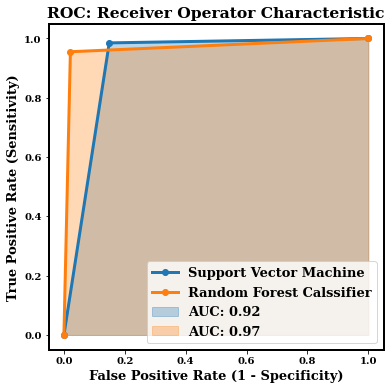

In [156]:
plt.plot(svc_fpr, svc_tpr, "-o", label = "Support Vector Machine", color = cm.colors[0])
plt.fill_between(svc_fpr, len(svc_tpr) * [0], svc_tpr, color = cm.colors[0], alpha = .3, label = "AUC: {:.2f}".format(svc_score))

plt.plot(rf_fpr, rf_tpr, "-o", label = "Random Forest Calssifier", color = cm.colors[2])
plt.fill_between(rf_fpr, len(rf_tpr) * [0], rf_tpr, color = cm.colors[2], alpha = .3, label = "AUC: {:.2f}".format(rf_score))

plt.title("ROC: Receiver Operator Characteristic", weight = "bold")
plt.xlabel("False Positive Rate (1 - Specificity)", weight = "bold")
plt.ylabel("True Positive Rate (Sensitivity)", weight = "bold")
plt.legend();plt.show()

### Feature Selection

### Variance Thresholding

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [171]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 1e-3)

X_train_postVT = selector.fit_transform(X_train)

X_train_postVT.shape, X_train.shape

((455, 19), (455, 30))

### Tree-based feature selection

Tree-based estimators can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features.

In [173]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [175]:
treeBasedSelector = ExtraTreesClassifier(n_estimators = 50)
treeBasedSelector.fit(X_train, y_train)
treeBasedSelector.feature_importances_

array([0.0418288 , 0.01613218, 0.07297852, 0.02702355, 0.00645477,
       0.03799058, 0.05309729, 0.1117418 , 0.00670057, 0.00612913,
       0.01888201, 0.00724472, 0.02846821, 0.04256571, 0.00667325,
       0.00659568, 0.00623813, 0.00899557, 0.00712148, 0.00830011,
       0.09347386, 0.0274252 , 0.08597545, 0.06445545, 0.01893491,
       0.04071346, 0.02381356, 0.09475435, 0.02060087, 0.00869083])

In [176]:
selector = SelectFromModel(treeBasedSelector, prefit = True)

X_train_postTBFS = selector.transform(X)

X_train_postTBFS.shape

(569, 11)

### Selection with F-score

ANOVA f-test to get the f-score of each feature with the output and select k best features

In [183]:
from sklearn.feature_selection import SelectKBest, f_classif

In [184]:
selector = SelectKBest(f_classif, k = 10)
selector.fit(X_train, y_train)

X_train_postSWFS = selector.transform(X_train)

X_train_postSWFS.shape

(455, 10)

In [185]:
f_scores, p_vals = f_classif(X_train, y_train)
f_scores

array([4.99961985e+02, 9.11557426e+01, 5.37004989e+02, 4.34070280e+02,
       6.77121994e+01, 2.71682821e+02, 4.13990396e+02, 6.84650717e+02,
       5.57049384e+01, 2.89496655e-01, 2.10007201e+02, 1.40861873e-01,
       1.97711944e+02, 1.82130094e+02, 3.85125143e+00, 3.71267001e+01,
       1.95428215e+01, 7.74757216e+01, 9.40297739e-02, 1.73426929e+00,
       6.60421179e+02, 1.16351645e+02, 6.85003815e+02, 4.99643268e+02,
       9.72621767e+01, 2.52965516e+02, 3.41882254e+02, 7.69829896e+02,
       9.56970634e+01, 5.08048902e+01])

### Hyper-parameter Tuning

#### Grid Search Cross validation

In [186]:
parameter_values = {'max_depth' : range(2, 6),
                    'max_features' : range(1, 10)}

In [189]:
from sklearn.model_selection import GridSearchCV

gridSearch = GridSearchCV(DecisionTreeClassifier(), parameter_values,\
                          verbose = 2, cv = 10)

# gridSearch.fit(X_train, y_train)

In [188]:
gridSearch.best_params_

{'max_depth': 3, 'max_features': 8}

#### Random Search Cross validation

In [195]:
from sklearn.model_selection import RandomizedSearchCV

randomSearch = RandomizedSearchCV(DecisionTreeClassifier(), parameter_values,\
                          verbose = 2, cv = 10)

# randomSearch.fit(X_train, y_train)

In [194]:
randomSearch.best_params_

{'max_features': 9, 'max_depth': 4}